In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [2]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Load the dataset
try:
    news = pd.read_csv('abcnews-date-text.csv')
except FileNotFoundError:
    print("Dataset not found. Please check the file path.")


In [4]:
# Display basic information about the dataset
print("Dataset Info:")
news.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244184 entries, 0 to 1244183
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1244184 non-null  int64 
 1   headline_text  1244184 non-null  object
dtypes: int64(1), object(1)
memory usage: 19.0+ MB


In [5]:
# Quick look at the first few rows
print("\nFirst few rows of the dataset:")
news.head()


First few rows of the dataset:
   publish_date                                      headline_text
0      20030219  aba decides against community broadcasting lic...
1      20030219     act fire witnesses must be aware of defamation
2      20030219     a g calls for infrastructure protection summit
3      20030219           air nz staff in aust strike for pay rise
4      20030219      air nz strike to affect australian travellers


In [6]:
# Check for missing values
print("\nMissing values in each column:")
news.isnull().sum()


Missing values in each column:
publish_date     0
headline_text    0
dtype: int64


In [7]:
# Check for duplicates
print("\nTotal number of duplicate rows:")
print(news.duplicated().sum())


Total number of duplicate rows:
2


In [8]:
# Drop duplicates if any
news.drop_duplicates(inplace=True, ignore_index=True)
print("\nData after dropping duplicates:")
news.info()


Data after dropping duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244182 entries, 0 to 1244181
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1244182 non-null  int64 
 1   headline_text  1244182 non-null  object
dtypes: int64(1), object(1)
memory usage: 19.0+ MB
None


In [9]:
# Check the unique values in 'headline_text'
print("\nUnique headlines count:")
news['headline_text'].nunique()


Unique headlines count:


1213004

In [10]:
# Handle missing values in 'headline_text' by dropping rows where 'headline_text' is NaN
news.dropna(subset=['headline_text'], inplace=True)
print("\nData after handling missing 'headline_text' values:")
news.info()


Data after handling missing 'headline_text' values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244182 entries, 0 to 1244181
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1244182 non-null  int64 
 1   headline_text  1244182 non-null  object
dtypes: int64(1), object(1)
memory usage: 19.0+ MB


In [11]:
# Convert 'publish_date' to datetime
news['publish_date'] = pd.to_datetime(news['publish_date'], format='%Y%m%d')
print("\nData after converting 'publish_date' to datetime:")
news.info()


Data after converting 'publish_date' to datetime:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244182 entries, 0 to 1244181
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   publish_date   1244182 non-null  datetime64[ns]
 1   headline_text  1244182 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 19.0+ MB


In [12]:
# Exploratory Data Analysis: Top 5 headlines by frequency
print("\nTop 5 most frequent headlines:")
news['headline_text'].value_counts().head()


Top 5 most frequent headlines:


headline_text
national rural news                      983
abc sport                                718
abc weather                              714
abc business news and market analysis    585
abc entertainment                        551
Name: count, dtype: int64

In [13]:
# Filter for business-related news headlines and create a copy
business_news = news[news['headline_text'].str.contains('business|market|finance|stocks|economy|investment|trading', case=False)].copy()

In [14]:
# Perform sentiment analysis using VADER
business_news['compound_score'] = business_news['headline_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
business_news['positive'] = business_news['headline_text'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
business_news['neutral'] = business_news['headline_text'].apply(lambda x: analyzer.polarity_scores(x)['neu'])
business_news['negative'] = business_news['headline_text'].apply(lambda x: analyzer.polarity_scores(x)['neg'])

In [15]:
# Display the first few rows after sentiment analysis
print("\nBusiness news data with VADER sentiment scores:")
business_news[['headline_text', 'compound_score', 'positive', 'neutral', 'negative']].head()


Business news data with VADER sentiment scores:


,headline_text,compound_score,positive,neutral,negative
20,businesses should prepare for terrorist attacks,-0.8225,0.000,0.345,0.655
151,resource stocks boost all ords,0.4019,0.403,0.597,0.000
163,shire offers assurances over finances,0.3400,0.375,0.625,0.000
165,slow recovery predicted for aust economy,0.0000,0.000,1.000,0.000
341,mud crab business on the move,0.0000,0.000,1.000,0.000


Text(0, 0.5, 'Frequency')

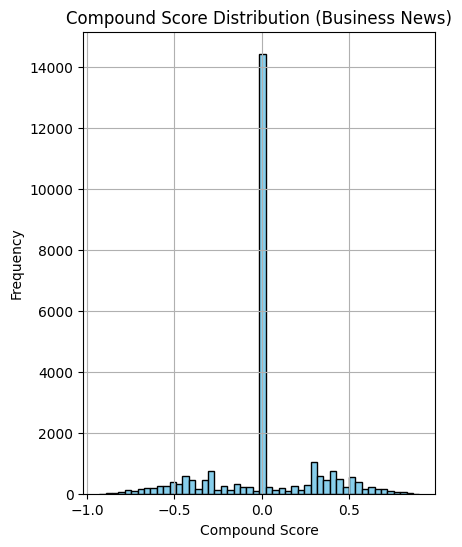

In [16]:
# Visualize sentiment distribution for business news
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
business_news['compound_score'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Compound Score Distribution (Business News)')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')

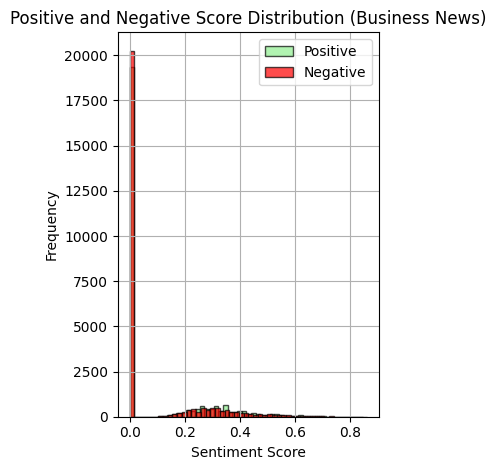

In [17]:
plt.subplot(1, 2, 2)
business_news['positive'].hist(bins=50, color='lightgreen', edgecolor='black', alpha=0.7, label='Positive')
business_news['negative'].hist(bins=50, color='red', edgecolor='black', alpha=0.7, label='Negative')
plt.title('Positive and Negative Score Distribution (Business News)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
# Filter data to focus on important columns for business news
business_news_df = business_news[['publish_date', 'headline_text', 'compound_score', 'positive', 'neutral', 'negative']]

In [19]:
# Reset index for the final business news dataframe
business_news_df.reset_index(drop=True, inplace=True)

In [20]:
# Display the final cleaned dataframe for business news
print("\nFinal cleaned business news dataframe:")
print(business_news_df.head())


Final cleaned business news dataframe:
  publish_date                                    headline_text  \
0   2003-02-19  businesses should prepare for terrorist attacks   
1   2003-02-19                   resource stocks boost all ords   
2   2003-02-19            shire offers assurances over finances   
3   2003-02-19         slow recovery predicted for aust economy   
4   2003-02-20                    mud crab business on the move   

   compound_score  positive  neutral  negative  
0         -0.8225     0.000    0.345     0.655  
1          0.4019     0.403    0.597     0.000  
2          0.3400     0.375    0.625     0.000  
3          0.0000     0.000    1.000     0.000  
4          0.0000     0.000    1.000     0.000  


In [21]:
# Save the cleaned business news data to a new CSV file
business_news_df.to_csv('cleaned_business_news_with_vader.csv', index=False)
print("Cleaned business news data with VADER sentiment scores has been saved to 'cleaned_business_news_with_vader.csv'")

Cleaned business news data with VADER sentiment scores has been saved to 'cleaned_business_news_with_vader.csv'
